<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Необходимо спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Имеются исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо прстроить модель с предельно большим значением *F1*-меры (довести до 0.59). 

Дополнительно проведём измерение *AUC-ROC*, сравнивая её значение с *F1*-мерой.

**Признаки**
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

**Целевой признак**

* Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

Загружаем и просматриваем данные

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head(30)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Изучаем общую информацию. Обращаем внимание на тип float в столбце Tenure. Его можно заменить на целочисленный тип, так как он отражает, сколько лет человек является клиентом банка.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Проверяем наличие пропущенных значений. Предполагаем, что отсутсвующие значения в стобце tenure связаны с тем, что клиент пользовался услугами банка меньше одного года. Исходя из этих рассуждений заполняем пропущенные значения в этом столбце на 0.

In [4]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
data['Tenure'] = data['Tenure'].fillna(0)
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Заменяем для удобства тип данных в столбце tenure на целочисленный.

In [6]:
data['Tenure'] = data['Tenure'].astype('int')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Для дальнейшего анализа нам вряд ли понадобятся столбцы с индексом строки в данных, фамилией и  уникальным идентификатором клиента. Удалим их из данных.

In [7]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Видим, что в столбце, содержаще информацию о поле клиентов, всего два значения. 

In [8]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Проверяем количество значений в столбце со страной проживания.

In [9]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Их всего 3. Всвязи с этим можем применить прямое кодирование.

In [10]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


 **Вывод**
 1. Данные загружены и изучены
 2. Пропущенные значения обнаружены и обработаны
 3. Заменён по необходимости тип данных
 4. Удалены столбцы, ненужные для дальнейшего анализа и работы
 5. Применено прямое кодирование

## Исследование задачи

Выделяем целевой признак: Exited

In [11]:
target = data['Exited']
features = data.drop('Exited', axis=1)

Разделяем исходные данные на обучающую, валидационную и тестовую выборки. Так как тестовая выборка не спрятана, отделяем 20% для валидационной выборки.

In [12]:
X, X_test, y, y_test = train_test_split(features, target, test_size=0.2, random_state=123)
features_train, features_valid, target_train, target_valid = train_test_split(X, y, test_size=0.25, random_state=12345)
print(X_test.shape)
print(features_train.shape)
print(features_valid.shape)

(2000, 11)
(6000, 11)
(2000, 11)


Вывели размеры выборок на экран и получили соотношение 3:1:1

Подсчитаем классы в целевом признаке и построим диаграмму для наглядности.
Видим, что почти 20% клиентов уходят.

0    7963
1    2037
Name: Exited, dtype: int64


<AxesSubplot:title={'center':'Факт ухода клиента'}>

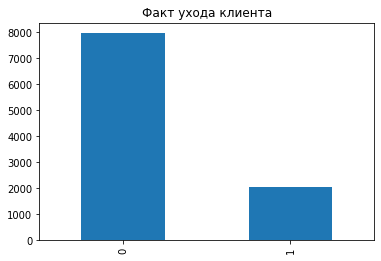

In [13]:
class_frequency = data['Exited'].value_counts()
print(class_frequency)
class_frequency.plot(kind='bar', title = 'Факт ухода клиента')

**Дерево решений**

Обучим модель и проанализируем классы.

0    1541
1     459
dtype: int64


<AxesSubplot:>

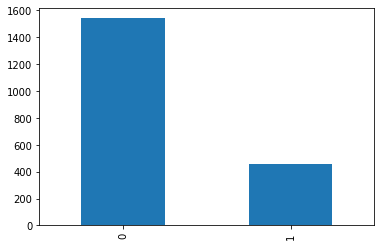

In [14]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
 
predicted_valid = pd.Series(model.predict(features_valid))

class_frequency = predicted_valid.value_counts()
print(class_frequency)
class_frequency.plot(kind='bar')

Практически ничего не изменилось. Наблюдается дисбаланс классов, примерно 4:1

Рассчитываем f1и auc_roc

In [15]:
f1 = f1_score(target_valid, predicted_valid)
f1

0.47652582159624407

In [16]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 

auc_roc

0.6786181955218186

Метрика f1 меньше необходимой, auc_roc также далека от хорошего значения.

**Случайный лес**

Обучим модель и рассмотрим метрику f1

In [17]:
model = RandomForestClassifier(n_estimators=150, random_state=12345)
model.fit(features_train, target_train) 
predicted_valid = model.predict(features_valid)

f1 = f1_score(target_valid, predicted_valid)
f1


0.565149136577708

In [18]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
auc_roc

0.8413643553727252

Метрика f1 меньше необходимой, но лучше, чем при применении решающего дерева.

auc_roc лучше, чем при применении решающего дерева.

**Логистическая регрессия**

In [19]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train) 
predictions_valid = model.predict(features_valid)

f1 = f1_score(target_valid, predicted_valid)
f1

0.565149136577708

In [20]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
auc_roc

0.5965345633210937

Метрика f1 меньше необходимой.

auc_roc самая низкая.

**Вывод**

1. Исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 
2. Обучены модели "Решающее Дерево", "Случайный лес", "Логистическая Регрессия" без учёта дисбаланса классов. 
3. Максимальное значение метрики f1 = 0.56 получено при обучении модели случайного леса и логистической регрессии.  Качество моделей не удовлетворяет условию технического задания.
4. Качество моделей также оценено по метрике roc_auc. Максимальное значение метрики roc_auc = 0.82 достигнуто при обучении модели случайного леса.

## Борьба с дисбалансом

**Взвешивание классов**

In [21]:
model = DecisionTreeClassifier(random_state=12345,  class_weight ='balanced' )
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5115712545676004


In [22]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight ='balanced' )
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4377478191911182


In [23]:
model = RandomForestClassifier(random_state=12345,  class_weight ='balanced' )
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5439739413680781


Взвешивание классов не дало улучшений.

**Увеличение и уменьшение выборки**

Так как наилучшие значения показала модель "Случайный лес", на ней и будем проверять результат увеличения и уменьшения выборки

In [24]:
def upsample(features, target, repeat):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [25]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

In [26]:
X_train_upsampled, y_train_upsampled = upsample(features_train, target_train, 2)
X_train_balanced, y_train_balanced = downsample(X_train_upsampled, y_train_upsampled, 0.75)

In [27]:
model = RandomForestClassifier(random_state=12345, n_estimators = 33, max_depth = 12)
model.fit(X_train_upsampled, y_train_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.594900849858357


In [28]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
auc_roc

0.8357614824455982

In [29]:
model = RandomForestClassifier(random_state=12345, n_estimators = 33, max_depth = 12)
model.fit(X_train_balanced, y_train_balanced)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5984251968503937


In [30]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
auc_roc

0.851474386074917

**Вывод**

Мы получили метрику f1>59 при увеличении и уменьшении выборки.

Наилучший результат мы получили при уменьшении выборки: f1=0.598, auc=0.85 (что близко к единице и является хорошим показателем)

Изучим также другие модели

In [31]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(X_train_upsampled, y_train_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4904761904761905


In [32]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(X_train_balanced, y_train_balanced)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5028312570781427


In [33]:
model = LogisticRegression(random_state=12345)
model.fit(X_train_upsampled, y_train_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.3385490753911806


In [34]:
model = LogisticRegression(random_state=12345)
model.fit(X_train_balanced, y_train_balanced)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.4087912087912088


Значения f1 не удовлетворяют условию.

## Тестирование модели

**Случайный лес**

In [35]:
X_upsampled, y_upsampled = upsample(X, y, 2)
X_balanced, y_balanced = downsample(X_upsampled, y_upsampled, 0.75)
model_final_1 = RandomForestClassifier(random_state=123,
                                         n_estimators=33,
                                         max_depth=12)
                                         
model_final_1.fit(X_balanced, y_balanced)
predictions = model_final_1.predict(X_test)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
print(f1)
print(roc_auc)


0.6323353293413173
0.7693449933293126


**Дерево решений**

In [36]:
X_upsampled, y_upsampled = upsample(X, y, 2)
X_balanced, y_balanced = downsample(X_upsampled, y_upsampled, 0.55)
model_final_2 = DecisionTreeClassifier(random_state=123,
                                         max_depth=8)
model_final_2.fit(X_balanced, y_balanced)
predictions = model_final_2.predict(X_test)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print(f1)
print(roc_auc)

0.6233230134158927
0.784973895986013


**Логистическая регрессия**

In [37]:
X_upsampled, y_upsampled = upsample(X, y, 2)
X_balanced, y_balanced = downsample(X_upsampled, y_upsampled, 0.55)
model_final_3 = LogisticRegression(random_state=12345)
model_final_3.fit(X_balanced, y_balanced)
predictions = model_final_3.predict(X_test)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print(f1)
print(roc_auc)

0.45128205128205123
0.6637333918160718


**Вывод**

1. Необходимое начение метрики f1 на тестовой выборке было достигнуто на двух моделях:
Случайный лес f1 = 0.63 roc_auc = 0.77
Решающее дерево f1 = 0.62 roc_auc = 0.78

2. Метрика f1 выше у модели Случайный лес, а roc_auc выше у Решающего дерева.

## Общий вывод

1. Данные изучены и обработаны для дальнейшей работы
2. Данные разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 
3. Изучены модели без учёта дисбаланса классов. Необходимая метрика f1 достигнута не была.
4. Был учтён дисбаланс классов и применены разные способы борьбы с ним. Необходимая метрика f1 была достигнута (0.6)
5. Проведено финальное тестирование модели: метрика f1=0.63 и f1=0.62 была достигнута на моделях случайного леса и дерева решений. При этом roc_auc выше у дерева решений.